# esssential libraries


In [1]:
!pip install qiskit qiskit-nature qiskit-aer qiskit-ibm-runtime
!pip install pylatexenc
!pip install matplotlib
!pip install numpy
!pip install scipy
!pip install qiskit-ibm-provider
!pip install qiskit-aer
!pip install pycryptodome

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.4/149.4 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 71.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 74.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 109.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 88.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.7/119.7 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 359.9/359.9 kB 23.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.9/434.9 kB 29.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 68.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.5/310.5 kB 22.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 76.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.

# multi bit qrng

In [2]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator , Aer
import numpy as np

def GnerateQ():
   n_bits = 8  # Choose the number of bits you want
   n_bits = 16 # -new modification in bit num to fit AES function req
   qc = QuantumCircuit(n_bits, n_bits)

# Apply Hadamard to all qubits to create superposition
   for i in range(n_bits):
    qc.h(i)
    qc.measure(i, i)

# Simulate the circuit
   simulator = Aer.get_backend('qasm_simulator')
   job = simulator.run(qc, shots=1)
   result = job.result()
   counts = result.get_counts()

# Extract the binary string from result
   random_bin = list(counts.keys())[0]
   print(f"Random {n_bits}-bit binary: {random_bin}")
   return random_bin


random_bin = GnerateQ()

Random 16-bit binary: 0101010000100000


# code valdation and entropy check

Sample bitstrings: [('10011100', 2), ('11011110', 3), ('11001100', 2), ('10101001', 4), ('11000101', 2)]

Bit Position | Frequency of 1s
           0 | 0.504
           1 | 0.483
           2 | 0.504
           3 | 0.517
           4 | 0.514
           5 | 0.506
           6 | 0.527
           7 | 0.500


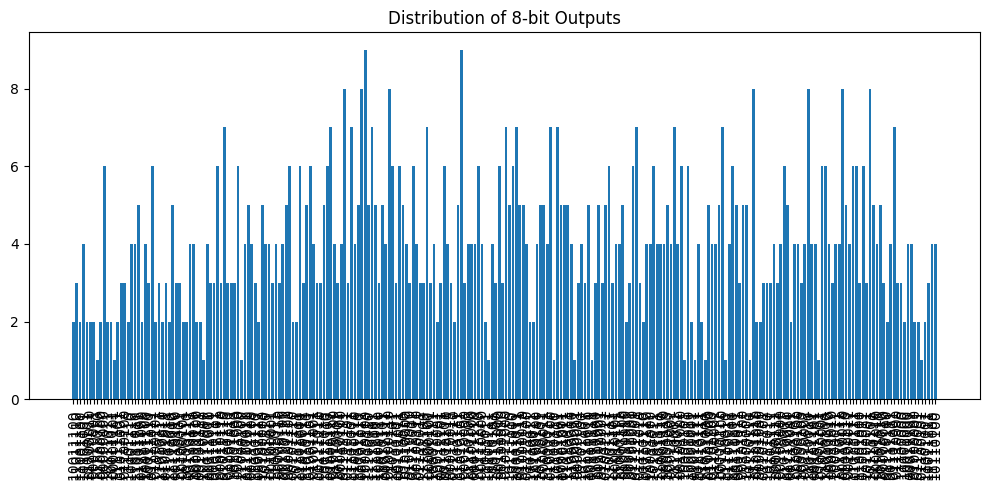


Entropy: 7.836 bits (max: 7.977)


In [3]:

from collections import Counter
import matplotlib.pyplot as plt
import math

n_bits = 8
shots = 1000  # Number of samples to test randomness

# Create circuit
qc = QuantumCircuit(n_bits, n_bits)
qc.h(range(n_bits))
qc.measure(range(n_bits), range(n_bits))

# Run on simulator
simulator = Aer.get_backend('qasm_simulator')
job = simulator.run(qc, shots=shots)
result = job.result()
counts = result.get_counts()

# Display a few samples
print("Sample bitstrings:", list(counts.items())[:5])

#  BIT-BY-BIT frequency analysis
bit_counts = [0] * n_bits  # Count of 1s per bit position

for bitstring, freq in counts.items():
    for i, bit in enumerate(reversed(bitstring)):  # reverse to match qubit order
        bit_counts[i] += int(bit) * freq

# Normalize to percentage
bit_freqs = [count / shots for count in bit_counts]

print("\nBit Position | Frequency of 1s")
for i, freq in enumerate(bit_freqs):
    print(f"{i:>12} | {freq:.3f}")

#  Byte distribution (uniformity check)
plt.figure(figsize=(10, 5))
plt.bar(counts.keys(), counts.values())
plt.title("Distribution of 8-bit Outputs")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#  Shannon Entropy
def entropy(counts, total_shots):
    return -sum((v / total_shots) * math.log2(v / total_shots) for v in counts.values())

entropy_value = entropy(counts, shots)
max_entropy = math.log2(len(counts))  # Should approach 8 for 8-bit output

print(f"\nEntropy: {entropy_value:.3f} bits (max: {max_entropy:.3f})")

#AES RSA algorithm usage


In [ ]:
!pip install pycryptodome

In [5]:
from Crypto.Cipher import AES, PKCS1_OAEP
from Crypto.PublicKey import RSA
data = b'mov3 n0rth'

# Ensure the key is 16 bytes long
key = bytes(random_bin, 'utf-8') # Convert the key to bytes
from hashlib import sha256
key = sha256(random_bin.encode()).digest()[:16]  # for AES-128
decrypted_key = key
nonce = b'0000000000000000'



#AES encoding
cipher = AES.new(decrypted_key, AES.MODE_EAX, nonce)

ciphertext, tag = cipher.encrypt_and_digest(data)
nonce = cipher.nonce

#rsa key gen
key_pair = RSA.generate(2048)
public_key = key_pair.publickey()


# Encrypt AES key with RSA public key
rsa_encryptor = PKCS1_OAEP.new(public_key)
rsa_encrypted_key = rsa_encryptor.encrypt(key)

# RSA: Decrypt AES key
rsa_decryptor = PKCS1_OAEP.new(key_pair)
decrypted_key = rsa_decryptor.decrypt(rsa_encrypted_key)

print(ciphertext)




b'\xef\xd5\x0eM\xde\x8d\x12\xd2\xc8b'


In [ ]:
# Decrypting :

cipher = AES.new(key, AES.MODE_EAX, nonce)
data = cipher.decrypt_and_verify(ciphertext, tag)
print(data.decode('utf-8'))

mov3 n0rth


# cryptoanalysis

In [ ]:
from hashlib import sha256 # this is a test that demonstrates how a tiney differ in 1 bit will make so much diffrence in the resulted bits

# Original QRNG string
qrng_original = "101010101001"
qrng_flipped = "101010101000"  # Flip 1 bit

key1 = sha256(qrng_original.encode()).digest()
key2 = sha256(qrng_flipped.encode()).digest()

# Count differing bits
bit_diffs = sum(bin(a ^ b).count("1") for a, b in zip(key1, key2))
print(f"Bit differences in SHA-256 output: {bit_diffs}/256")


Bit differences in SHA-256 output: 128/256


In [ ]:
from collections import Counter

# Simulate 100 QRNG runs

results = [GnerateQ() for q in range(100)]
bit_counts = Counter("".join(results))
print("0s:", bit_counts['0'], "1s:", bit_counts['1'])
ratio = bit_counts['1'] / bit_counts['0']
print("Ratio of 1s to 0s:", ratio)

Random 16-bit binary: 0001110010111000
Random 16-bit binary: 1110001101001001
Random 16-bit binary: 1001001000001000
Random 16-bit binary: 1010101001000111
Random 16-bit binary: 0100101000100000
Random 16-bit binary: 0010001110011111
Random 16-bit binary: 0000001111110101
Random 16-bit binary: 1010111010111010
Random 16-bit binary: 1110101101100111
Random 16-bit binary: 0110011111101001
Random 16-bit binary: 0001010011111000
Random 16-bit binary: 1100011001101111
Random 16-bit binary: 1010100100111101
Random 16-bit binary: 0000111100101010
Random 16-bit binary: 0111100110100101
Random 16-bit binary: 0010010010001110
Random 16-bit binary: 1100101101101001
Random 16-bit binary: 1110010001011001
Random 16-bit binary: 1001111001111010
Random 16-bit binary: 1010101111110010
Random 16-bit binary: 0001111110010010
Random 16-bit binary: 0011000010001001
Random 16-bit binary: 1000001000111101
Random 16-bit binary: 0101001111000000
Random 16-bit binary: 1100001001101111
Random 16-bit binary: 101

In [ ]:
from collections import Counter
from scipy.stats import chisquare
import random



# Simulate 100 runs → 800 bits total
results = [GnerateQ() for _ in range(int(10000*(1/8)))] # did simble math to get to 10000 bits sample
bitstream = "".join(results)

# Count 0s and 1s
bit_counts = Counter(bitstream)
count_0 = bit_counts['0']
count_1 = bit_counts['1']
total = count_0 + count_1

# Print basic counts and ratio
print("0s:", count_0, "1s:", count_1)
print("Ratio of 1s to 0s:", round(count_1 / count_0, 4))

# Run chi-square test
observed = [count_0, count_1]
expected = [total / 2, total / 2]
chi_stat, p_val = chisquare(observed, expected)

# Print chi-square results
print("Chi-square statistic:", round(chi_stat, 4))
print("p-value:", round(p_val, 4))

if p_val > 0.05:
    print(" Distribution is statistically uniform.")
else:
    print(" Distribution may be biased.")


Random 16-bit binary: 0011011101010000
Random 16-bit binary: 0100101010000010
Random 16-bit binary: 0010000100101001
Random 16-bit binary: 0000011000011110
Random 16-bit binary: 1010010000011111
Random 16-bit binary: 1101110010100100
Random 16-bit binary: 0010001110010000
Random 16-bit binary: 0101100100111110
Random 16-bit binary: 1101111100101100
Random 16-bit binary: 0100101010110010
Random 16-bit binary: 0111101110000011
Random 16-bit binary: 1110110001011000
Random 16-bit binary: 0100100101000101
Random 16-bit binary: 1010111110000000
Random 16-bit binary: 0101100011111100
Random 16-bit binary: 1010000011001111
Random 16-bit binary: 0010100010000010
Random 16-bit binary: 0001000100000000
Random 16-bit binary: 0110110001010010
Random 16-bit binary: 1110011100111000
Random 16-bit binary: 1110101110010110
Random 16-bit binary: 0110111110110111
Random 16-bit binary: 1000110100100101
Random 16-bit binary: 1111111000100001
Random 16-bit binary: 0001000000011111
Random 16-bit binary: 010